# 1. Business Problem

Email continues to be a ubiquitous & growing form of communication all over the world , with an estimated 3.8 billion users sending 281 billion mails everyday. We all have experience the Gmail Smart compose, maybe without even knowing that we are actually using Gmail Smart Compose in daily life. While typing an email, sometimes we get suggestions from the Gmail to complete our sentence, based on how we usually write that kind of sentence. This predictive suggestions is known as Gmail Smart Compose. Inspired by Gmail Smart Compose, here we have tried to build a Deep Learning model to give predictive suggestions for the text input, which will reduce the repetitive typing & assists users with rational predictions. Here the task in hand is to create a model, which can help us predict the sentence or word based on the given text. The input is a sequence of words & the output is also a sequence of words, there we would need to build a sequence-based model. The objective of this case study is to enhance the typing experience with the help of suggestive typing, taking inspiration from Gmail’s research paper on Gmail Smart Compose.


# 2. Dataset Analysis

For this problem we have use the “The Enron Email Dataset” which contains approximately 500,000 emails from 150 employees of the Enron Corporation. It was obtained by the Federal Energy Regulatory Commission during its investigation of Enron’s collapse. The dataset is publicly available on Kaggle.

Data Source: - https://www.kaggle.com/datasets/wcukierski/enron-email-dataset?resource=download

# 3. Performance metric

For this problem I will be using perplexity and BLEU (Bilingual Evaluation Understudy)BLEU (Bilingual Evaluation Understudy) as performance metric. 


BLEU (Bilingual Evaluation Understudy) score, which is an algorithm for evaluating the quality of text which has been machine translated from one language to another. BLEU’s output is always a number between 0 & 1. This indicates how similar the candidate text is to the reference texts, with values closer to 1 representing more similar texts. Few human translations will attain a score of 1, since this would indicate that the candidate is identical to one of the reference translations.


Perplexity :- Perplexity is a metric used to judge how good a language model is. We can define perplexity as the inverse probability of the test set, normalised by the number of words:
Since we’re taking the inverse probability, hence lower perplexity indicates a better model. And we can interpret perplexity as the weighted branching factor. suppose for a model If we have a perplexity of 100, it means that whenever the model is trying to guess the next word it is as confused as if it had to pick between 100 words. Which is not good for our model.

More about this metric:- https://towardsdatascience.com/perplexity-in-language-models%0287a196019a94


# 3. EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading the Data & Preprocessing

In [ ]:
import numpy as np
import seaborn as sns
import os
from os import path
import sys
import email
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from tqdm import tqdm
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
import numpy as np
import seaborn as sns
import os
from os import path
import sys
import email
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Data/emails.csv')

In [ ]:
data.head(5)

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [ ]:
print(data['message'].iloc[0])

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


Storing details from the email body to different columns

In [ ]:
def get_text(email):
  msg = []
  for i in email.walk():
    if i.get_content_type() == 'text/plain':
      msg.append(i.get_payload())
  return ''.join(msg)

In [ ]:
if not path.exists('/content/drive/My Drive/Data/main_data.csv'):
  df = pd.DataFrame()
  #emails = list(data['message'].apply(email.message_from_string))
  cols = data[0].keys()
  for col in cols:
    df[col] = [x[col] for x in data]
  df['content'] = list(map(get_text, data))
  df.to_csv('/content/drive/My Drive/Data/main_data.csv', index = False)
else:
  print('File Already Present')


File Already Present


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Data/main_data.csv', nrows = 200000)
data.head(5)

,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content
0,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...
1,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,NaN,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s..."
2,<30965995.1075863688265.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 04:17:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Greg,\n\n How about either next Tuesday or Thu..."
3,<17189699.1075863688308.JavaMail.evans@thyme>,"Fri, 14 Jul 2000 06:59:00 -0700 (PDT)",phillip.allen@enron.com,joyce.teixeira@enron.com,Re: PRC review - phone calls,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Joyce Teixeira,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,any morning between 10 and 11:30
4,<30795301.1075855687494.JavaMail.evans@thyme>,"Mon, 16 Oct 2000 06:44:00 -0700 (PDT)",phillip.allen@enron.com,zimam@enron.com,FW: fixed forward or other Collar floor gas pr...,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,zimam@enron.com,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,---------------------- Forwarded by Phillip K ...


In [ ]:
data.isnull().sum()

Message-ID                        0
Date                              0
From                              0
To                             7953
Subject                        8288
Mime-Version                      6
Content-Type                      6
Content-Transfer-Encoding         6
X-From                            6
X-To                           3179
X-cc                         150513
X-bcc                        199936
X-Folder                          6
X-Origin                          6
X-FileName                      472
content                           0
dtype: int64

In [ ]:
data.nunique()

Message-ID                   200000
Date                         118108
From                          12716
To                            35623
Subject                       89028
Mime-Version                      1
Content-Type                      2
Content-Transfer-Encoding         3
X-From                        16867
X-To                          43640
X-cc                          19453
X-bcc                            56
X-Folder                       3480
X-Origin                        192
X-FileName                      323
content                      129420
dtype: int64

# Calculating the length of each mail content

In [ ]:
data['content_len'] = data['content'].apply(len)

# Plotting histogram for mail length

Text(0, 0.5, 'Frequency')

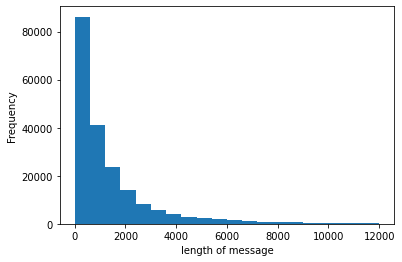

In [ ]:
import matplotlib.pyplot as plt
pl = list(data['content_len'])
plt.hist(pl,range = [1,12000],bins = 20)
plt.xlabel('length of message')
plt.ylabel('Frequency')

# Observations

1. From the above plot we can observe that length for most of the mails are less that 1000. In which almost 66 % of mails have lenght less that 500.

2. Very few emails have length greater than 6000.

# PDF Plot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


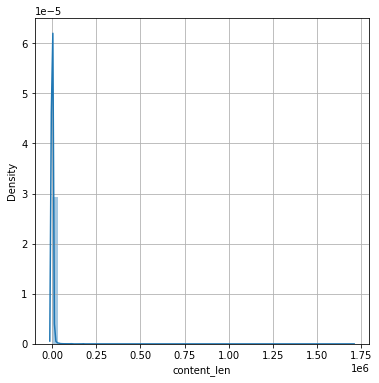

In [ ]:
import seaborn as sns

pl = data['content_len'].sample(6000)
plt.figure(figsize=(6,6))
sns.distplot(pl)
plt.grid()
plt.show()

# Observations

1. We observed peak coming down at somewhere around 12500 which means that most of the emails have length ranging b/w 0-12500.
2. Also long tail indicates that there are some outlier emails have lenght greater than 25000.

# CDF Plot

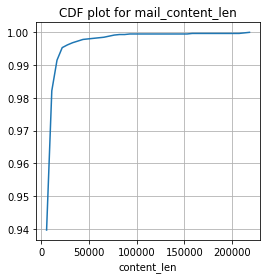

In [ ]:
plt.figure(figsize=(4,4))
count ,bin_edges=np.histogram(pl,bins=40,density=True)
pdf=count/(sum(count))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("content_len")
plt.title("CDF plot for mail_content_len")
plt.grid()
plt.show()

# Observations
1. From above CDF plot we can see that almost 98% message text length is less than 12.5k characters, So only 2% messages are have message text length more than 10K characters
2. Also from above plot we can conclude that in our dataset we have more messages which are having less than 12.5k characters hence we are going to remove all the messages whcih are hacing message length more than 12.5k characters

# Percentiles of lengths of email

In [ ]:
for i in range(0,110,10):
  print("The "+str(i)+"th percentile of lengths of message is:", np.percentile(pl,i))
  print("#"*50)

The 0th percentile of lengths of message is: 3.0
##################################################
The 10th percentile of lengths of message is: 103.0
##################################################
The 20th percentile of lengths of message is: 216.0
##################################################
The 30th percentile of lengths of message is: 359.0
##################################################
The 40th percentile of lengths of message is: 557.0
##################################################
The 50th percentile of lengths of message is: 795.0
##################################################
The 60th percentile of lengths of message is: 1115.4
##################################################
The 70th percentile of lengths of message is: 1536.0
##################################################
The 80th percentile of lengths of message is: 2258.2
##################################################
The 90th percentile of lengths of message is: 3943.4000000000015
########

# Performing some Preprocessing

In [ ]:
#here we apply all the cleaning things
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def data_cleaning(text):
    if text is not None:
        #stopwords_list = stopwords.words('english')
        q = re.sub('Message-ID[^\n]+', ' ', text)
        q = re.sub('Date[^\n]+', ' ', q)
        q = re.sub('X[^\n]+', ' ', q)
        q = re.sub('Content[^\n]+', ' ', q)
        q = re.sub('From[^\n]+', ' ', q)
        q = re.sub('To[^\n]+', ' ', q)
        q = re.sub('Subject[^\n]+', ' ', q)
        q = re.sub('Mime-Version[^\n]+', ' ', q)
        q = re.sub('.*?\(.*?\)',' ',q)
        q = re.sub('--[^\n]+', ' ', q)
        q = re.sub('cc:[^\n]+|Cc:[^\n]+', ' ', q)
        q = re.sub('Sent:[^\n]+', '', q)
        q = re.sub('email address:[^\n]+', ' ', q)
        q = re.sub('[0-9]+', ' ', q)
        q = re.sub('[\/:]', ' ', q)
        q = re.sub('AM|PM|a\.m\.|p\.m\.', ' ', q)
        q = re.sub('\(|\)|,|;|\.|!', ' ', q)
        q = re.sub('-[^\n]+', '', q)
        q = re.sub('-', ' ', q)
        q = re.sub('\?', ' ', q)
        q = re.sub('\@', ' ', q)
        q = re.sub('[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+', ' ', q)
        q = re.sub('(Write to:|From:).*',' ',q)
        q = re.sub('re:', ' ', q)
        q = re.sub('\[[^]]*\]', ' ', q)
        q = re.sub(r'[^\w\s]',' ',q)
        #remove the < anykeyword> like this from the data
        q = re.sub('<.*>',' ',q)
        #remove the all word which is present in the bracket
        q = re.sub('\(.*\)',' ',q)
        #remove all the new lines
        q = re.sub(r'[\n\t-]*','',q)

        #remove all the word which is end with :
        q = re.sub(r'\w+:\s?','',q)

        #replace the short word with there full words code taken from donors choose assignment
            # specific
        q = re.sub(r"won't", " will not", q)
        q = re.sub(r"can\'t", " can not", q)

        # general
        q = re.sub(r"n\'t", " not", q)
        q = re.sub(r"\'re", " are", q)
        q = re.sub(r"\'s", " is", q)
        q = re.sub(r"\'d", " would", q)
        q = re.sub(r"\'ll", " will", q)
        q = re.sub(r"\'t", " not", q)
        q = re.sub(r"\'ve", " have", q)
        q = re.sub(r"\'m", " am", q)

        q = re.sub(r'\b_([a-zA-z]+)_\b',r'\1' , q)
        q = re.sub(r'\b_([a-zA-z]+)\b',r'\1' , q)
        q = re.sub(r'\b([a-zA-z]+)_\b',r'\1' , q)

        #remove _ sign from the word like di_shivam and we want only shivam
        q = re.sub(r'\b[a-zA-Z]{1}_([a-zA-Z]+)',r'\1'  , q)
        q = re.sub(r'\b[a-zA-Z]{2}_([a-zA-Z]+)',r'\1' , q)

        #convert all into a lower case
        q = q.lower()

        #remove the words which are greater than or equal to 15 or less than or equal to 2
        #https://stackoverflow.com/questions/24332025/remove-words-of-length-less-than-4-from-string
        q = re.sub(r'\b\w{,2}\b' ,'', q)
        q = re.sub(r'\b\w{15,}\b','', q)

        #replace all the words except "A-Za-z_" with space
        q= re.sub(r'[^a-zA-Z_]',' ',q)
        q = q.replace("\n", " ")
#       f = ' '.join([word for word in q.split() if word not in stopwords.words("english")])\
        f = ' '.join([word for word in q.split()])
        return f


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
output = []
for i in tqdm(data.content.values):
    a = data_cleaning(i)
    output.append(a)

100%|██████████| 200000/200000 [10:01<00:00, 332.64it/s]


In [ ]:
data = pd.DataFrame()
data['preprocess_mail'] = output

In [ ]:
data['content_len'] = data['preprocess_mail'].apply(len)
data.head(5)

,preprocess_mail,content_len
0,traveling have business meeting takes the fun ...,534
1,randy can you send schedule the salary and lev...,132
2,greg how about either next tuesday thursday ph...,51
3,any morning between and,23
4,buckner buck buck buckner honeywell com philli...,1276


# Checking for Duplicates

In [ ]:
data["preprocess_mail"].duplicated().sum()

80021

In [ ]:
print(data.shape)
data.drop_duplicates(subset = "preprocess_mail",inplace=True)
print(data.shape)

(200000, 2)
(119979, 2)


# Plotting the bar plot for words and occurance of the words

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer_rare_words = Tokenizer(filters='')
tokenizer_rare_words.fit_on_texts(data["preprocess_mail"].values)
word_index = tokenizer_rare_words.word_index
word_counts= tokenizer_rare_words.word_counts

In [ ]:
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda kv: kv[1],reverse=True)) #sorting in decending order

In [ ]:
len(sorted_word_counts)

497875

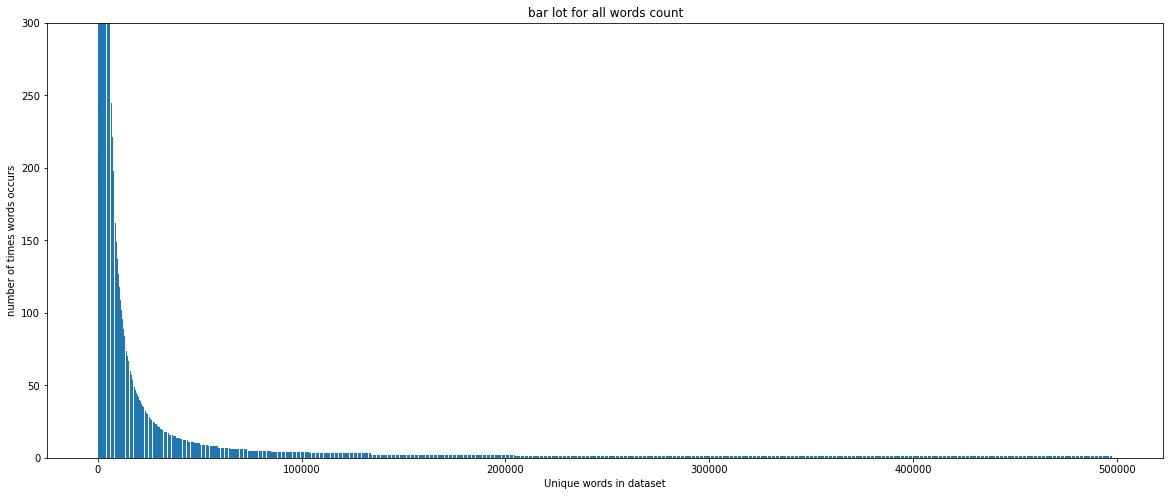

CPU times: user 13min 51s, sys: 21.6 s, total: 14min 12s
Wall time: 14min 21s


In [ ]:
%%time
words = list(sorted_word_counts.keys())
counts = list(sorted_word_counts.values())
plt.figure(figsize=(20,8))
plt.bar(range(len(words)), counts)
plt.xlabel('Unique words in dataset')
plt.ylabel('number of times words occurs')
plt.title('bar lot for all words count')
plt.ylim(0,300)
plt.show()

# Removing those sentences which contains rare words

In [ ]:
pl = data['content_len']
for i in range(0,100,1):
  print("The "+str(i)+"th percentile of lengths of message is:", np.percentile(pl,i))
  print("#"*50)

The 0th percentile of lengths of message is: 0.0
##################################################
The 1th percentile of lengths of message is: 12.0
##################################################
The 2th percentile of lengths of message is: 19.0
##################################################
The 3th percentile of lengths of message is: 25.0
##################################################
The 4th percentile of lengths of message is: 30.0
##################################################
The 5th percentile of lengths of message is: 36.0
##################################################
The 6th percentile of lengths of message is: 41.0
##################################################
The 7th percentile of lengths of message is: 47.0
##################################################
The 8th percentile of lengths of message is: 52.0
##################################################
The 9th percentile of lengths of message is: 58.0
##########################################

In [ ]:
#removing further data points based on the 5th and 95th percentile values
data_final = data[(data.content_len > 0.0) & (data.content_len< 3721.0)]
data_final.shape

(113977, 2)

In [ ]:
vocab=[]
for i,j in sorted_word_counts.items():
    if j > 200:
        vocab.append(i)
print("final vocab size after removing the rare words ",len(vocab))

final vocab size after removing the rare words  7562


In [ ]:
#https://book.pythontips.com/en/latest/for_-_else.html#:~:text=for%20loops%20also%20have%20an,understand%20where%20to%20use%20them.
index_values=[]
for i in tqdm(range(data_final["preprocess_mail"].shape[0])):
    for j in data_final["preprocess_mail"].iloc[i].split():
        if j not in vocab:
            break
    else:
        index_values.append(i)

100%|██████████| 113977/113977 [00:41<00:00, 2753.95it/s]


In [ ]:
len(index_values)

15112

In [ ]:
final_data=data_final.iloc[index_values]
final_data.shape

(15112, 2)

# Plotting the words cloud from final dataset

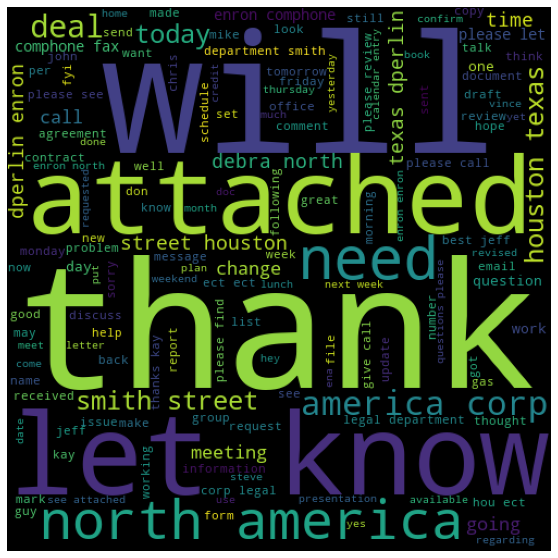

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')
clean_mail_content = wc.generate(final_data["preprocess_mail"].str.cat(sep=" "))
plt.figure(figsize=(18,10))
plt.axis("off")
plt.imshow(clean_mail_content)

# Plotting the most common N-grams from our cleaned mail content (text)

In [ ]:
from collections import Counter

def generate_N_grams(texts,ngram=2):
    '''this function will calcualte most common bigrams and trigrams for text data and plot the bar plot'''
    common_bigrams=[]
    for text in tqdm(texts):
        words=[word for word in text.split(" ")]  
        temp=zip(*[words[i:] for i in range(0,ngram)])
        bigrams=[' '.join(ngram) for ngram in temp]
        common_bigrams.extend(bigrams)
    count_n=Counter(common_bigrams).most_common(30)
    Nuteraltemp = pd.DataFrame(count_n)
    Nuteraltemp.columns = ['Common_words','count'] 
    fig,ax=plt.subplots(figsize=(15,8))
    sns.barplot(x = 'count',
            y = 'Common_words',
            data = Nuteraltemp)
    plt.show()

Top 30 Bi grams

100%|██████████| 15112/15112 [00:00<00:00, 53106.65it/s]


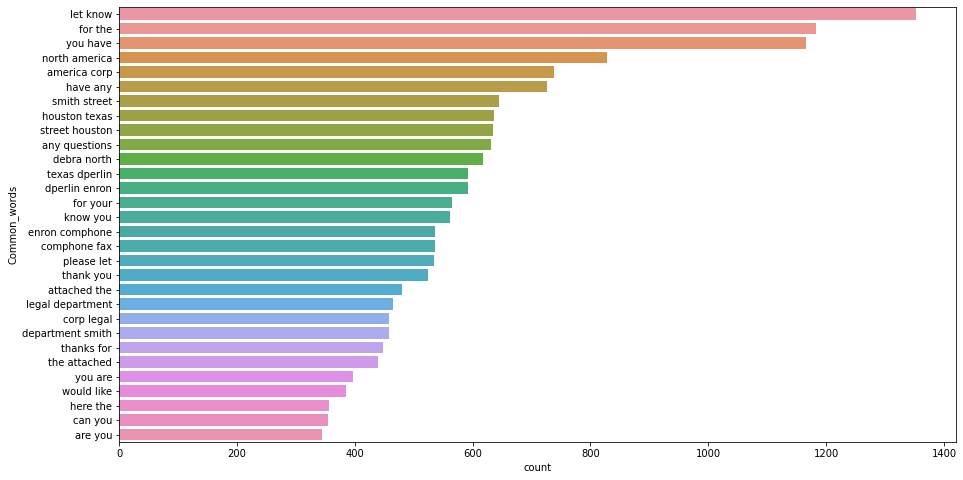

In [ ]:
generate_N_grams(final_data["preprocess_mail"].values,2)

Top 30 Trigrams

100%|██████████| 15112/15112 [00:00<00:00, 64664.16it/s]


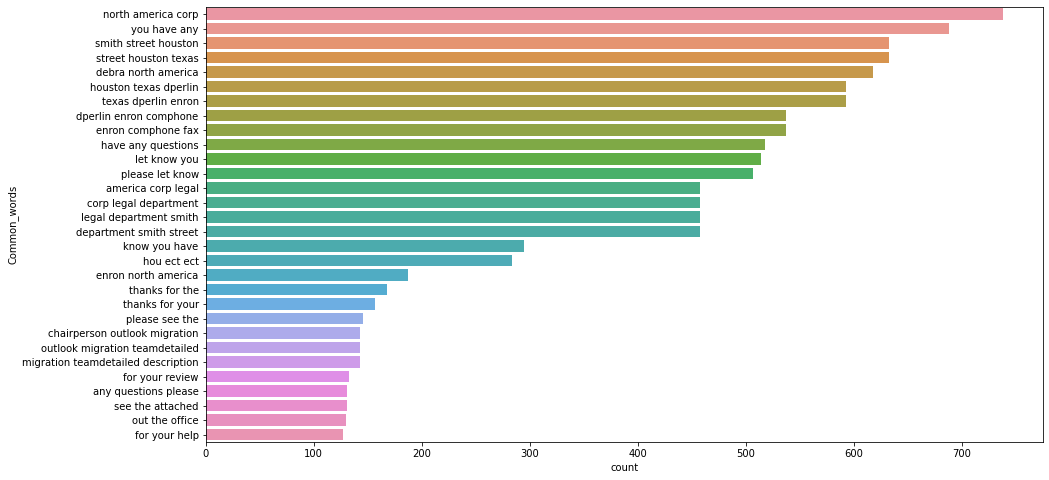

In [ ]:
generate_N_grams(final_data["preprocess_mail"].values,3)

Top 30 4grams

100%|██████████| 15112/15112 [00:00<00:00, 67420.66it/s]


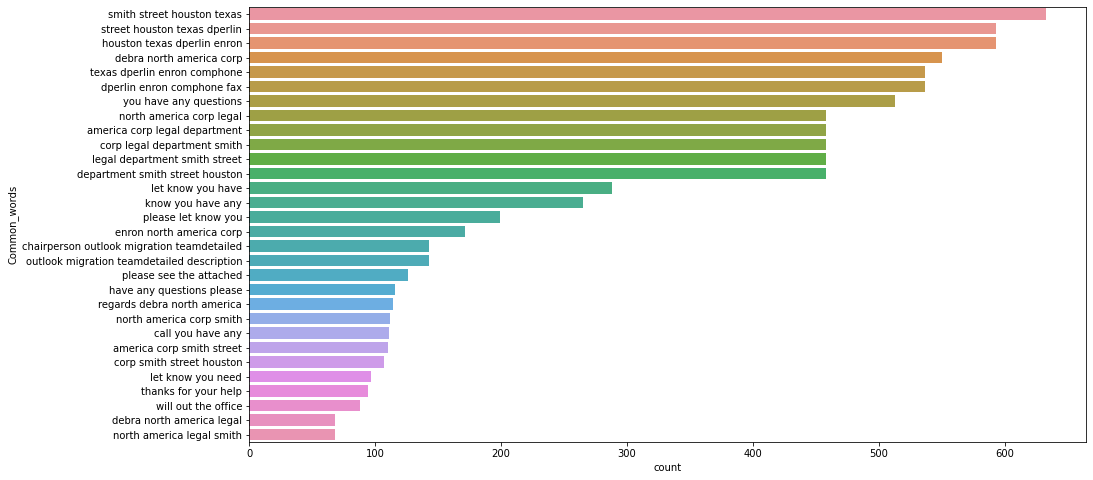

In [ ]:
generate_N_grams(final_data["preprocess_mail"].values,4)

In [ ]:
final_data

,preprocess_mail,content_len
1,randy can you send schedule the salary and lev...,132
2,greg how about either next tuesday thursday ph...,51
3,any morning between and,23
8,tim mike grigsby having problems with accessin...,130
14,nymex expiration during this time frame please...,57
...,...,...
199971,that the new confirm refer the credit amendmen...,328
199974,hello attached above the documentation for dea...,105
199977,the attached details sale,25
199980,good morning stewart below short description i...,207


In [ ]:
final_data.drop(["content_len"],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
final_data

,preprocess_mail
1,randy can you send schedule the salary and lev...
2,greg how about either next tuesday thursday ph...
3,any morning between and
8,tim mike grigsby having problems with accessin...
14,nymex expiration during this time frame please...
...,...
199971,that the new confirm refer the credit amendmen...
199974,hello attached above the documentation for dea...
199977,the attached details sale
199980,good morning stewart below short description i...


In [ ]:
import pickle
pickle.dump(final_data,open('/content/drive/My Drive/Data/MyEDA_D15.pkl','wb'))
final_data = pickle.load(open('/content/drive/My Drive/Data/MyEDA_D15.pkl','rb'))